In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.utils import resample
import tpot
from tpot import TPOTClassifier
import warnings
warnings.filterwarnings('ignore')

/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
test=pd.read_csv('/Users/dehilinesma/Downloads/Final Project- Risk Analysis/credit_test.csv')

In [3]:
train=pd.read_csv('/Users/dehilinesma/Downloads/Final Project- Risk Analysis/credit_train.csv')

In [4]:
frames = [train, test]

df = pd.concat(frames)

## Data Description 

In [5]:
df.shape

(110867, 19)

In [6]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.100000e+05,88865.000000,8.886500e+04,110000.000000,110000.000000,51553.000000,110000.000000,110000.000000,1.100000e+05,1.099980e+05,109774.000000,109989.000000
mean,1.174621e+07,1076.594644,1.377449e+06,18468.526823,18.202485,34.907086,11.124491,0.168055,2.942822e+05,7.541012e+05,0.117614,0.029448
std,3.176716e+07,1475.581902,1.063920e+06,12195.564391,7.015575,21.965315,5.011093,0.484389,3.772773e+05,8.014002e+06,0.351290,0.261054
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795860e+05,705.000000,8.488440e+05,10211.930000,13.500000,16.000000,8.000000,0.000000,1.121950e+05,2.731575e+05,0.000000,0.000000
50%,3.120260e+05,724.000000,1.173459e+06,16202.440000,16.900000,32.000000,10.000000,0.000000,2.096650e+05,4.673900e+05,0.000000,0.000000
75%,5.239300e+05,741.000000,1.651670e+06,23997.522500,21.700000,51.000000,14.000000,0.000000,3.674838e+05,7.831945e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [10]:
#categorical data 
cat=df.select_dtypes(include=['object'])
cat.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

In [11]:
# We look for numeric data
num = df.select_dtypes(exclude=['object'])
num.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

<AxesSubplot:>

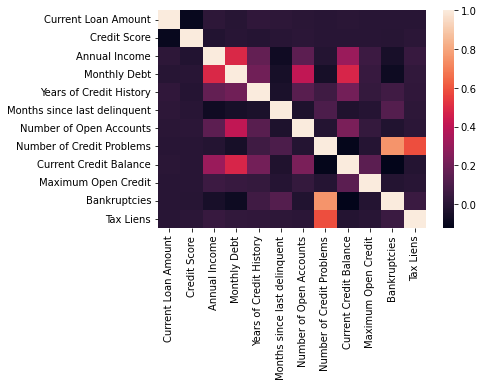

In [12]:
# Your code here
corr=df.corr()
sns.heatmap(df.corr())

In [13]:
df.isna().sum()

Loan ID                           867
Customer ID                       867
Loan Status                     10867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
dtype: int64

In [14]:
df.duplicated().sum()
df.drop_duplicates()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,NaN,157806.0,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9.0,0.0,87058.0,234410.0,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,NaN,132550.0,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,NaN,223212.0,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8.0,1.0,99636.0,568370.0,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,NaN,99999999.0,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,0.0,0.0


<Figure size 720x432 with 0 Axes>

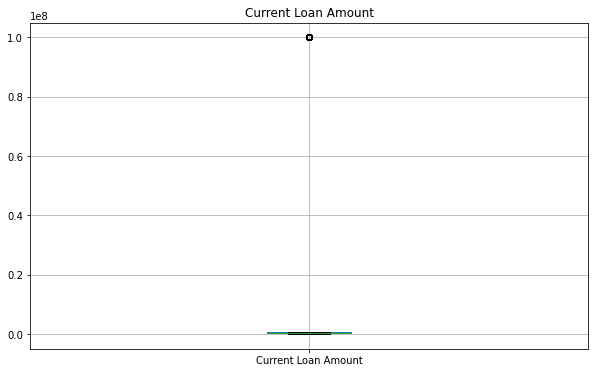

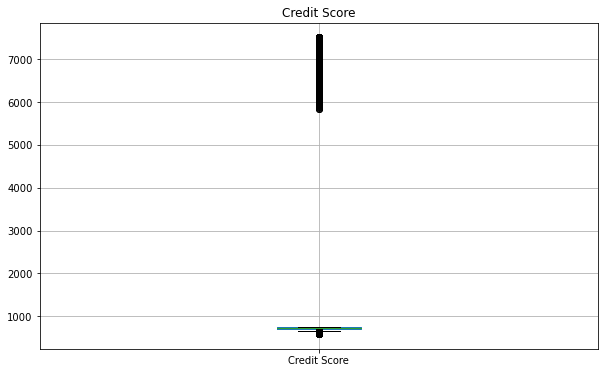

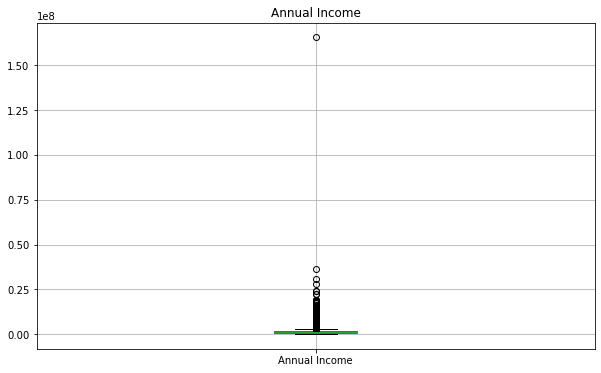

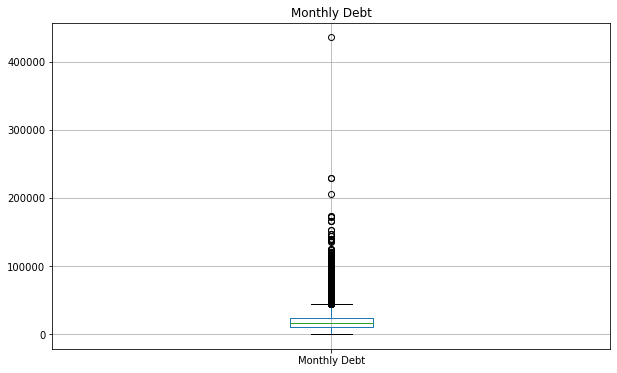

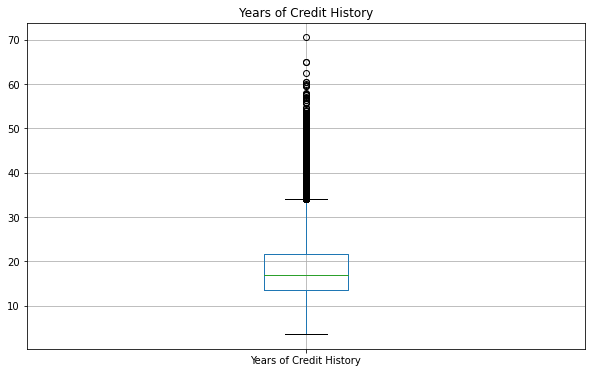

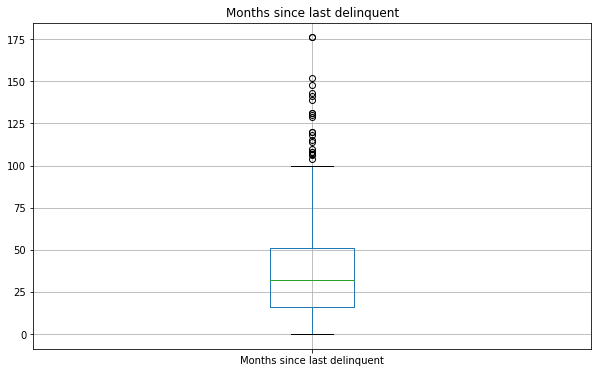

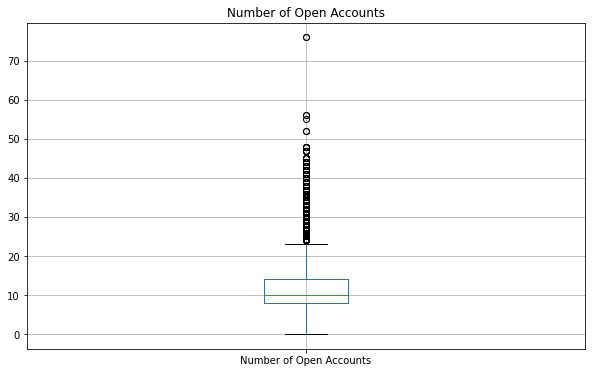

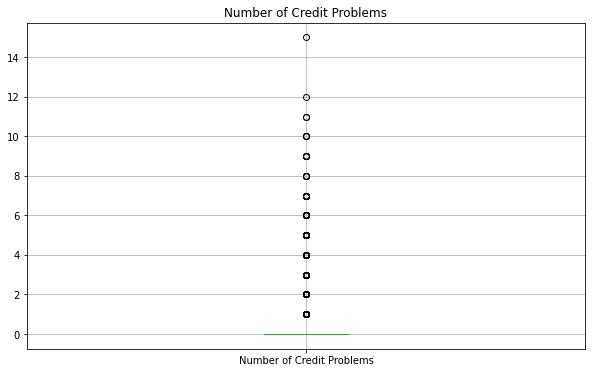

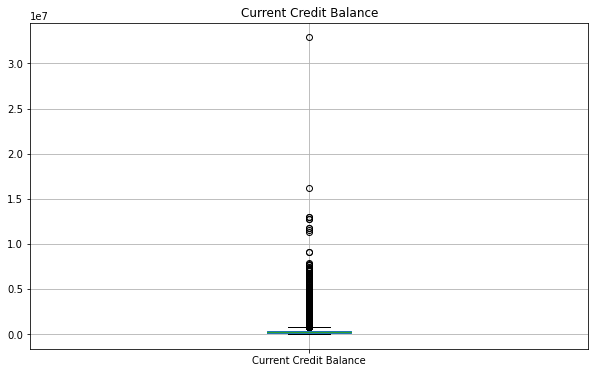

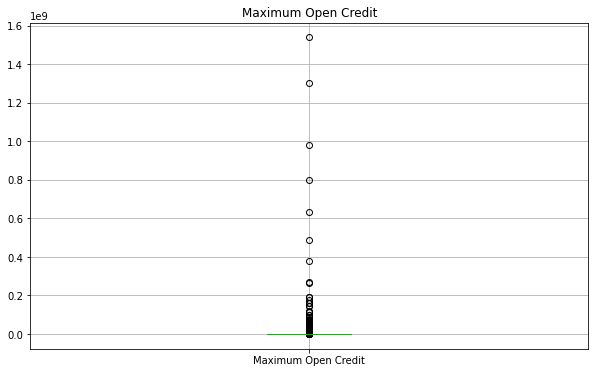

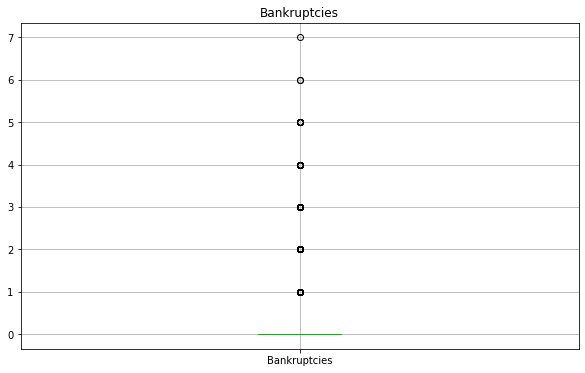

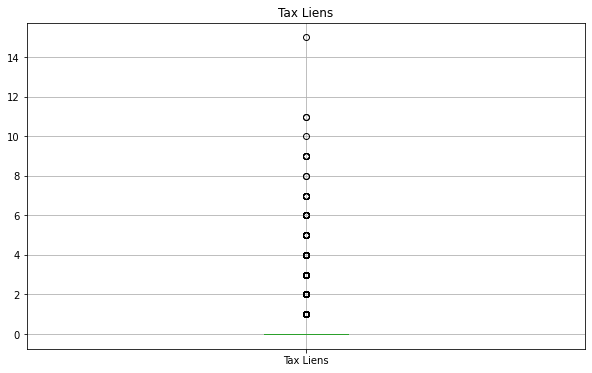

In [15]:
#Check Outliers

# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

## Checking  the outliers

### Loan Status

In [16]:
df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [17]:
df.isna().sum()

Loan ID                           867
Customer ID                       867
Loan Status                     10867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
dtype: int64

In [18]:
df[(df['Loan Status'].isna()) & (df['Loan ID'].isna()) & (df['Customer ID'].isna()) & (df['Bankruptcies'].isna())]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.dropna(subset = ['Loan Status'], inplace= True)

In [20]:
df['Loan Status'].isna().sum()

0

In [21]:
df['Loan Status'].describe()

count         100000
unique             2
top       Fully Paid
freq           77361
Name: Loan Status, dtype: object

### Number of Credit Problems

In [22]:
df['Number of Credit Problems'].value_counts()

0.0     86035
1.0     12077
2.0      1299
3.0       378
4.0       125
5.0        49
6.0        17
7.0         8
8.0         4
11.0        2
10.0        2
9.0         2
15.0        1
12.0        1
Name: Number of Credit Problems, dtype: int64

### Bankruptcies

In [23]:
df['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

### Credit Score

In [24]:
df['Credit Score'].value_counts()

747.0     1825
740.0     1746
746.0     1742
741.0     1732
742.0     1723
          ... 
5920.0       1
5900.0       1
6010.0       1
5960.0       1
6050.0       1
Name: Credit Score, Length: 324, dtype: int64

In [25]:
df[df['Credit Score']>3000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,5eee6c31-62d4-400c-a81f-37bd373db926,039ee8d2-3321-4683-9592-cb1a360c34e2,Charged Off,198572.0,Short Term,7420.0,526205.0,2 years,Rent,Debt Consolidation,9910.02,16.5,NaN,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,ce1f8220-7eba-4ec1-8bef-ca28f4916801,3e108ac9-9b7c-44a9-9289-e389cf3085b1,Charged Off,110924.0,Short Term,7070.0,804631.0,4 years,Rent,Debt Consolidation,11533.00,13.3,61.0,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,096471bd-820e-4d0e-88a7-d699a59ab87a,4cfda7f6-790e-4493-a9b1-4d35a8b63af9,Charged Off,175362.0,Short Term,6880.0,1060162.0,9 years,Rent,Debt Consolidation,16079.13,17.3,NaN,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,36da0533-8664-4156-8e96-f0d07966acdb,070e3aa9-d077-404c-8946-59ce976e0b70,Charged Off,88968.0,Short Term,6790.0,441845.0,< 1 year,Rent,other,5375.86,8.5,NaN,10.0,0.0,193306.0,535458.0,0.0,0.0


In [26]:
df['Credit Score new'] = np.where(df['Credit Score']>3000, (df['Credit Score']>3000)/10, df['Credit Score'])

In [27]:
df['Credit Score new'].describe()

count    80846.000000
mean       676.281005
std        167.390720
min          0.100000
25%        698.000000
50%        721.000000
75%        738.000000
max        751.000000
Name: Credit Score new, dtype: float64

In [28]:
df[df['Credit Score']<300]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new


In [29]:
df[df['Credit Score new']>3000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new


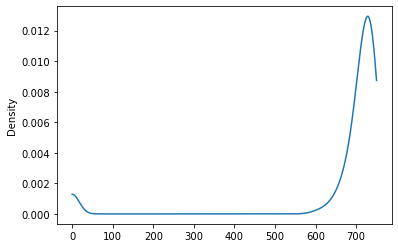

In [30]:
ax = df['Credit Score new'].plot.kde(ind=range(int(df['Credit Score new'].min()),int(df['Credit Score new'].max())))

<AxesSubplot:title={'center':'Credit Score new'}, xlabel='Number of Credit Problems'>

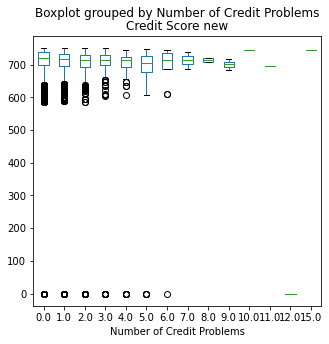

In [31]:
df.boxplot(by ='Number of Credit Problems', column =['Credit Score new'], grid = False, figsize=(5,5)) 

In [32]:
df['Credit Score new'].interpolate(inplace=True)

In [33]:
df['Credit Score new'].isna().sum()

0

In [34]:
# Create an array of indices where employment length is greater than 60
indices = df[df['Credit Score new'] < 300].index
df = df.drop(indices)

<AxesSubplot:>

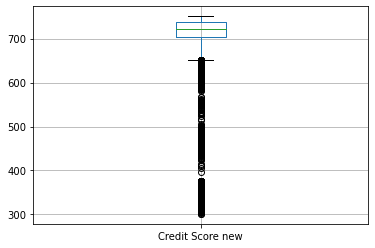

In [35]:
df.boxplot(['Credit Score new'])

### Years of Credit History

In [36]:
df[df['Years of Credit History']==70.5]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
30310,7db95e04-1081-43e1-8dab-77d0202145f8,6bb86735-f834-42b3-bd98-360da7094185,Fully Paid,134398.0,Short Term,743.0,645316.0,6 years,Home Mortgage,Home Improvements,0.0,70.5,78.0,5.0,2.0,0.0,0.0,0.0,0.0,743.0


<AxesSubplot:>

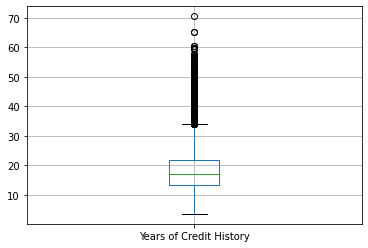

In [37]:
df.boxplot(['Years of Credit History'])

### Number of Open Accounts

In [38]:
df[df['Number of Open Accounts']==76]


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
96033,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Charged Off,449372.0,Short Term,708.0,2328564.0,5 years,Home Mortgage,Debt Consolidation,41720.2,15.7,NaN,76.0,0.0,771514.0,2674650.0,0.0,0.0,708.0


<AxesSubplot:>

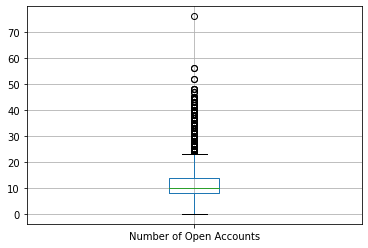

In [39]:
df.boxplot(['Number of Open Accounts'])

In [40]:
# Create an array of indices where employment length is greater than 60
indices = df[df['Number of Open Accounts'] > 50].index
df = df.drop(indices)

In [41]:
df['Number of Open Accounts'].describe()

count    95069.000000
mean        11.117146
std          4.989201
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         48.000000
Name: Number of Open Accounts, dtype: float64

array([[<AxesSubplot:title={'center':'Number of Open Accounts'}>]],
      dtype=object)

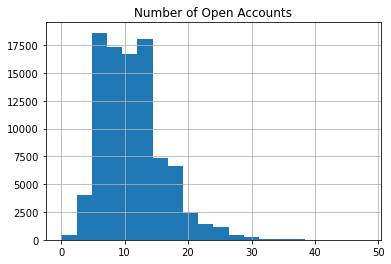

In [42]:
df.hist(['Number of Open Accounts'], bins=20)

### Years in current job

In [43]:
df['Years in current job'].value_counts()

10+ years    29651
2 years       8698
< 1 year      7769
3 years       7763
5 years       6475
1 year        6112
4 years       5866
6 years       5386
7 years       5276
8 years       4350
9 years       3763
Name: Years in current job, dtype: int64

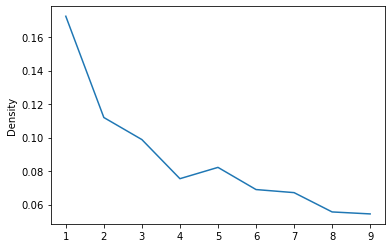

In [44]:
df['Years in current job']=df['Years in current job'].str.extract('(\d+)').astype(float)
ax = df['Years in current job'].plot.kde(ind=range(int(df['Years in current job'].min()),int(df['Years in current job'].max())))

In [45]:
df['Years in current job'].interpolate(inplace=True)

In [46]:
df['Years in current job'].isna().sum()

0

### Annual Income

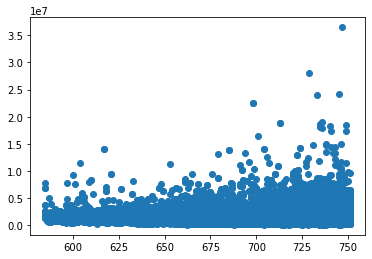

In [47]:
plt.scatter(df['Credit Score new'],df['Annual Income'] )
plt.show()

In [48]:
df['Annual Income'].isna().sum()

18779

In [49]:
df['Annual Income'].interpolate(inplace=True)

<AxesSubplot:>

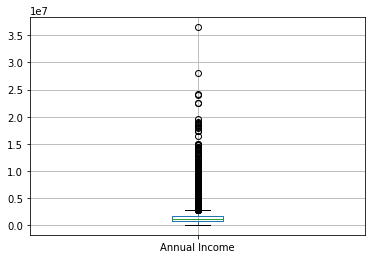

In [50]:
df.boxplot(['Annual Income'])

In [51]:
df['Annual Income'].isna().sum()

0

###  Dropping Months since last delinquent & Credit Score

In [52]:
df.drop(['Months since last delinquent', 'Credit Score'], axis=1, inplace= True )
df.dropna(subset=['Maximum Open Credit','Bankruptcies','Tax Liens'],inplace=True)

### Current Loan Amount

In [53]:
df[df['Current Loan Amount']==99999999]


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,714628.0,3.0,Rent,Debt Consolidation,11851.06,16.0,16.0,0.0,203965.0,289784.0,0.0,0.0,728.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,776188.0,1.0,Own Home,Debt Consolidation,11578.22,8.5,6.0,0.0,134083.0,220220.0,0.0,0.0,740.0
13,01d878ae-efa2-41e2-8159-6c834ff09f47,900c9191-2c20-4688-af7e-07c59b5d5a24,Fully Paid,99999999.0,Short Term,1560907.0,4.0,Rent,Debt Consolidation,17560.37,13.3,10.0,1.0,225549.0,496474.0,1.0,0.0,743.0
26,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,Fully Paid,99999999.0,Short Term,1029857.0,1.0,Rent,Debt Consolidation,13817.18,12.0,6.0,0.0,138339.0,221232.0,0.0,0.0,724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,Fully Paid,99999999.0,Short Term,1058376.0,1.0,Home Mortgage,Other,11554.09,10.1,12.0,0.0,14098.0,333300.0,0.0,0.0,674.0
99971,fa1a1ef5-3697-469c-a842-538b8dcfb63a,567c8737-56d2-4aa8-b6a2-c55182f28518,Fully Paid,99999999.0,Long Term,1530564.0,8.0,Rent,Medical Bills,13264.85,28.0,10.0,0.0,111283.0,162910.0,0.0,0.0,616.0
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,1190046.0,1.0,Rent,other,11969.81,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0,742.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,732.0


In [54]:
df['Current Loan Amount'].max()

99999999.0

In [55]:
df[(df['Current Loan Amount']== 99999999) & (df['Loan Status'] != 'Fully Paid' )]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new


In [56]:
df['Current Loan Amount'] = df['Current Loan Amount'].replace(99999999, 0)

<AxesSubplot:>

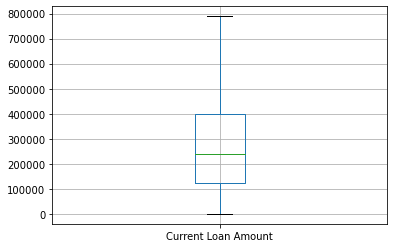

In [57]:
df.boxplot(['Current Loan Amount'])

### Term

In [58]:
df['Term'].value_counts()

Short Term    68898
Long Term     25976
Name: Term, dtype: int64

### Purpose

In [59]:
df['Purpose'].value_counts()

Debt Consolidation      74485
other                    5734
Home Improvements        5574
Other                    3127
Business Loan            1458
Buy a Car                1210
Medical Bills            1062
Buy House                 642
Take a Trip               546
major_purchase            334
small_business            257
moving                    141
wedding                   111
vacation                   96
Educational Expenses       88
renewable_energy            9
Name: Purpose, dtype: int64

### Monthly Debt

<AxesSubplot:>

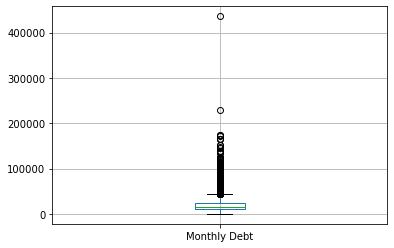

In [60]:
df.boxplot(['Monthly Debt'])

In [61]:
# Create an array of indices where employment length is greater than 60
indices = df[df['Monthly Debt'] > 200000].index
df = df.drop(indices)

<AxesSubplot:>

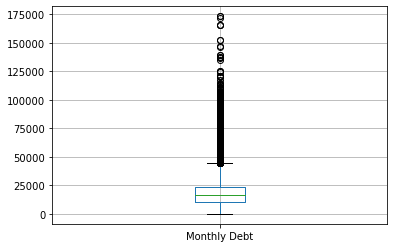

In [62]:
df.boxplot(['Monthly Debt'])

### Current Credit Balance

In [63]:
df['Current Credit Balance'].describe()

count    9.487200e+04
mean     2.945468e+05
std      3.637611e+05
min      0.000000e+00
25%      1.123232e+05
50%      2.093705e+05
75%      3.679350e+05
max      1.298696e+07
Name: Current Credit Balance, dtype: float64

<AxesSubplot:>

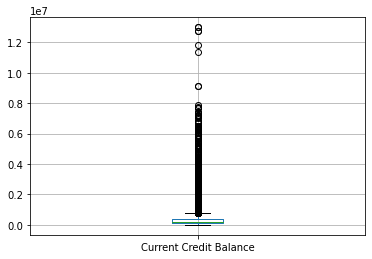

In [64]:
df.boxplot(['Current Credit Balance'])

In [65]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score new'],
      dtype='object')

In [66]:
df.describe()

,Current Loan Amount,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
count,94872.000000,9.487200e+04,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,9.487200e+04,9.487200e+04,94872.000000,94872.000000,94872.000000
mean,274024.386078,1.382989e+06,5.984669,18478.654091,18.209889,11.119582,0.168522,2.945468e+05,7.629483e+05,0.117896,0.029050,710.568655
std,201978.520388,8.699835e+05,3.463795,12096.705276,7.015618,4.987476,0.482031,3.637611e+05,8.551359e+06,0.351542,0.256832,52.337610
min,0.000000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,301.050000
25%,122430.000000,8.756862e+05,3.000000,10216.632500,13.500000,8.000000,0.000000,1.123232e+05,2.737625e+05,0.000000,0.000000,703.000000
50%,237688.000000,1.206671e+06,6.000000,16221.820000,16.900000,10.000000,0.000000,2.093705e+05,4.687210e+05,0.000000,0.000000,721.000000
75%,400471.500000,1.649732e+06,10.000000,24025.357500,21.700000,14.000000,0.000000,3.679350e+05,7.853725e+05,0.000000,0.000000,737.000000
max,789250.000000,3.647544e+07,10.000000,173265.560000,70.500000,48.000000,15.000000,1.298696e+07,1.539738e+09,7.000000,15.000000,751.000000


## EDA

#Create the scatter plot for age and amount
plt.scatter(df['Loan Status'],df['Credit Score new'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

<AxesSubplot:>

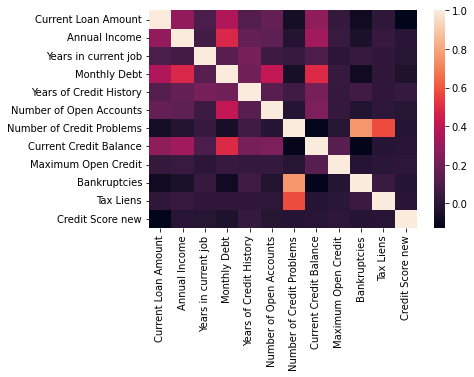

In [67]:
corr=df.corr()
sns.heatmap(df.corr())

In [68]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score new'],
      dtype='object')

In [69]:
# Create a cross table of the loan term and loan status
pd.crosstab(df['Purpose'], df['Loan Status'], margins = True)


Loan Status,Charged Off,Fully Paid,All
Purpose,,,
Business Loan,379,1079,1458
Buy House,104,538,642
Buy a Car,154,1056,1210
Debt Consolidation,14137,60346,74483
Educational Expenses,13,75,88
Home Improvements,936,4638,5574
Medical Bills,220,842,1062
Other,490,2637,3127
Take a Trip,91,455,546


In [70]:
pd.crosstab(df['Loan Status'],df['Home Ownership'],
            values=df['Years in current job'], aggfunc='count')

Home Ownership,HaveMortgage,Home Mortgage,Own Home,Rent
Loan Status,,,,
Charged Off,24,7834,1651,8412
Fully Paid,182,38318,7041,31410


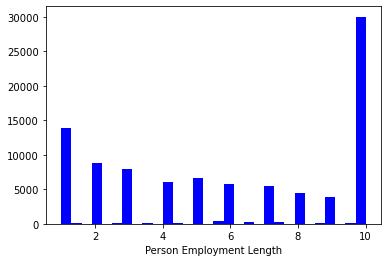

In [71]:
# Create a histogram of employment length
n, bins, patches = plt.hist(df['Years in current job'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [72]:
df.shape

(94872, 18)

In [73]:
df.drop(['Loan ID', 'Customer ID'], axis=1, inplace= True )

In [74]:
#df.to_csv('/Users/dehilinesma/Downloads/Final Project- Risk Analysis/clean_data.csv')

## Encoding 

In [75]:
target_labels = {'Charged Off': 1, 'Fully Paid': 0 }
df['Loan Status'] = df['Loan Status'].apply(lambda x: target_labels[x])

df

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
0,0,445412.0,Short Term,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.00
1,0,262328.0,Short Term,1699692.5,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,725.00
2,0,0.0,Short Term,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.00
3,0,347666.0,Long Term,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.00
4,0,176220.0,Short Term,995571.5,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,360.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,147070.0,Short Term,475437.0,7.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,725.00
99996,0,0.0,Short Term,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,732.00
99997,0,103136.0,Short Term,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,742.00
99998,0,530332.0,Short Term,1717524.0,9.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,746.00


In [76]:
#categorical data 
cat=df.select_dtypes(include=['object'])
cat.columns

Index(['Term', 'Home Ownership', 'Purpose'], dtype='object')

In [77]:
lable = LabelEncoder()

for x in cat:
    # to have a dict of class & encode 
    lable.fit(df[x])
    label_name_mapping = dict(zip(lable.classes_, lable.transform(lable.classes_)))
    print(label_name_mapping)
    df[x]=lable.fit_transform(df[x])

df

{'Long Term': 0, 'Short Term': 1}
{'HaveMortgage': 0, 'Home Mortgage': 1, 'Own Home': 2, 'Rent': 3}
{'Business Loan': 0, 'Buy House': 1, 'Buy a Car': 2, 'Debt Consolidation': 3, 'Educational Expenses': 4, 'Home Improvements': 5, 'Medical Bills': 6, 'Other': 7, 'Take a Trip': 8, 'major_purchase': 9, 'moving': 10, 'other': 11, 'renewable_energy': 12, 'small_business': 13, 'vacation': 14, 'wedding': 15}


,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
0,0,445412.0,1,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.00
1,0,262328.0,1,1699692.5,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,725.00
2,0,0.0,1,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.00
3,0,347666.0,0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.00
4,0,176220.0,1,995571.5,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,360.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,147070.0,1,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,725.00
99996,0,0.0,1,1289416.0,1.0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,732.00
99997,0,103136.0,1,1150545.0,6.0,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,742.00
99998,0,530332.0,1,1717524.0,9.0,3,3,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,746.00


In [78]:
num=df.select_dtypes(include=['float64'])
num.columns

Index(['Current Loan Amount', 'Annual Income', 'Years in current job',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score new'],
      dtype='object')

In [79]:
df.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Credit Score new             0
dtype: int64

### Creating a correlation Matrix 

In [80]:
# Create correlation matrix

def get_redundant_pairs():
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations():
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs()
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:5]

print("\nTop Absolute Correlations")
print(get_top_abs_correlations())


Top Absolute Correlations
Number of Credit Problems  Bankruptcies               0.753661
                           Tax Liens                  0.577648
Monthly Debt               Current Credit Balance     0.491139
Annual Income              Monthly Debt               0.483560
Monthly Debt               Number of Open Accounts    0.414215
dtype: float64


In [81]:
df.dtypes

Loan Status                    int64
Current Loan Amount          float64
Term                           int64
Annual Income                float64
Years in current job         float64
Home Ownership                 int64
Purpose                        int64
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
Credit Score new             float64
dtype: object

In [82]:
df.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Credit Score new             0
dtype: int64

## Balance the data¶

In [83]:
df['Loan Status'].value_counts()

0    76951
1    17921
Name: Loan Status, dtype: int64

In [84]:
majo = df[df['Loan Status'] == 0]
mino = df[df['Loan Status'] == 1]
 
# Downsample majority class
majority = resample(majo, n_samples=len(mino))

# Combine minority class with downsampled majority class
df1 = pd.concat([majority, mino])

df1['Loan Status'].value_counts()

df1

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score new
41727,0,435424.0,0,1.173754e+06,10.0,3,3,15135.02,18.0,5.0,0.0,373901.0,439978.0,0.0,0.0,726.500000
31209,0,395054.0,1,1.537110e+06,10.0,1,3,21481.59,18.5,20.0,0.0,471219.0,1364088.0,0.0,0.0,713.000000
98890,0,48708.0,1,1.147410e+06,2.0,3,3,13482.02,15.0,5.0,0.0,58995.0,110726.0,0.0,0.0,717.000000
79105,0,528154.0,1,1.710513e+06,1.0,1,3,26940.67,13.5,20.0,0.0,931456.0,1346466.0,0.0,0.0,723.000000
58991,0,579260.0,0,1.138062e+06,10.0,3,3,27408.26,31.8,20.0,0.0,728422.0,2430626.0,0.0,0.0,729.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,1,380204.0,1,1.046805e+06,9.0,2,3,32625.28,16.9,8.0,0.0,268964.0,415800.0,0.0,0.0,728.000000
99975,1,274076.0,1,7.096500e+05,10.0,3,3,4204.70,35.3,13.0,0.0,102866.0,844712.0,0.0,0.0,736.000000
99981,1,666666.0,1,3.838380e+06,7.0,1,3,48939.44,12.4,18.0,0.0,507414.0,1004322.0,0.0,0.0,725.000000
99988,1,309474.0,1,9.749533e+05,10.0,1,3,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0,721.333333


## Split 

In [85]:
Y = df1['Loan Status']
x = df1.drop('Loan Status', axis=1)
x_train, x_test, Y_train, Y_test= train_test_split(x, Y, test_size=0.2)

### Balanced  data

In [86]:
Y_train.value_counts()

1    14340
0    14333
Name: Loan Status, dtype: int64

## Feature selection

In [87]:
# SelectFromModel: Meta-transformer for selecting features based on importance weights.
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(x, Y)

In [88]:
n_features = s.transform(x).shape[1]
n_features

8

In [89]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name

Index(['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'Credit Score new'],
      dtype='object')

## Second split with the selected features 

In [90]:
y = df1['Loan Status']
X = df1[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'Credit Score new']]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [91]:
# Create and fit the logistic regression model
clf_logistic= LogisticRegression(solver='lbfgs')
clf_logistic.fit(X_train, y_train)

# Print the models coefficients
print(clf_logistic.coef_)

# Print the intercept of the model
print(clf_logistic.intercept_)

[[ 2.15571475e-06 -3.60484919e-07  3.99729289e-06 -7.34081918e-06
  -1.31991372e-06 -1.98633473e-07 -3.08364141e-08 -2.24670686e-04]]
[-2.13717093e-07]


In [92]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [93]:
# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
preds_df = pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

# Reassign loan status based on the threshold
preds_df['loan_status_predicted'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
preds_df['predicted_status']= preds_df['prob_default'].apply(lambda x: 'Non Default' if x > 0.4 else 'Default')
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status_predicted']))

# Print the classification report
target_names = ['Non Default','Default']
print(classification_report(y_test, preds_df['loan_status_predicted'], target_names=target_names))

[[ 854 2715]
 [ 326 3274]]
              precision    recall  f1-score   support

 Non Default       0.72      0.24      0.36      3569
     Default       0.55      0.91      0.68      3600

    accuracy                           0.58      7169
   macro avg       0.64      0.57      0.52      7169
weighted avg       0.63      0.58      0.52      7169



In [94]:
pd.crosstab(preds_df['Loan Status'], preds_df['predicted_status'], margins = True)

predicted_status,Default,Non Default,All
Loan Status,,,
0,854,2715,3569
1,326,3274,3600
All,1180,5989,7169


0.5773469103082717


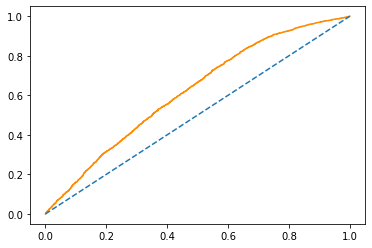

0.6189453161483142

In [95]:
# Print the accuracy score the model
score= clf_logistic.score(X_test, y_test)
print(score)
# Plot the ROC curve of the probabilities of default
prob_default1 = preds[:, 1]
w=fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default1)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc1 = roc_auc_score(y_test, prob_default1)
auc1

## Decision tree model xgboost

In [96]:
# Running the Model
xgb_clf= xgb.XGBClassifier()

# Fitting the model
xgb_clf.fit(X_train,y_train)

# Predicting the model
xgb_predict= xgb_clf.predict(X_test)

[11:06:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Hyper Parameter Optimization

In [97]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
# Hyperparameter optimization using RandomizedSearchCV

random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-pack

/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-pack

[11:07:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subs

In [98]:
# Finding the best estimators
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [99]:
# Finding the best param
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

### XGBClassifier with optimal parameters

In [100]:
# XGBClassifier with optimal parameters
xgb_clf= xgb.XGBClassifier( min_child_weight= 7,
                            max_depth = 3,
                            learning_rate = 0.15,
                            gamma = 0.4,
                            colsample_bytree = 0.7)
# Fitting the model
xgb_clf.fit(X_train,np.ravel(y_train))


[11:07:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

[[ 902 2667]
 [ 163 3437]]
              precision    recall  f1-score   support

 Non Default       0.85      0.25      0.39      3569
     Default       0.56      0.95      0.71      3600

    accuracy                           0.61      7169
   macro avg       0.71      0.60      0.55      7169
weighted avg       0.70      0.61      0.55      7169

{'Current Loan Amount': 94.0, 'Annual Income': 102.0, 'Monthly Debt': 65.0, 'Years of Credit History': 46.0, 'Number of Open Accounts': 22.0, 'Current Credit Balance': 44.0, 'Maximum Open Credit': 90.0, 'Credit Score new': 93.0}


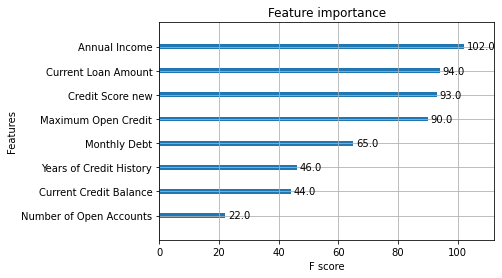

In [101]:
# Create predictions of probability for loan status using test data
preds2 = xgb_clf.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df2 = pd.DataFrame(preds2[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
preds_df2 = pd.concat([true_df.reset_index(drop = True), preds_df2], axis = 1)

# Reassign loan status based on the threshold
preds_df2['loan_status_predicted'] = preds_df2['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
preds_df2['predicted_status']= preds_df2['prob_default'].apply(lambda x: 'Non Default' if x > 0.4 else 'Default')
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df2['loan_status_predicted']))

# Print the classification report
target_names = ['Non Default','Default']
print(classification_report(y_test, preds_df2['loan_status_predicted'], target_names=target_names))

# Print the column importances from the model
print(xgb_clf.get_booster().get_score(importance_type = 'weight'))

# Plot the column importance for this model
xgb.plot_importance(xgb_clf, importance_type = 'weight')
plt.show()


The accuracy of the XGB is: 62.379690333379834 %


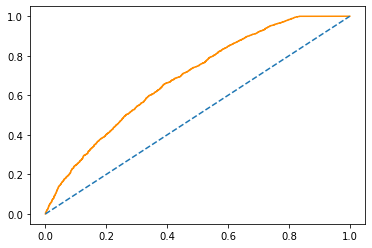

0.6884554497058

In [102]:
# Print the accuracy score the model
score2= xgb_clf.score(X_test, y_test)
print('The accuracy of the XGB is:', score2 * 100, '%')

# Plot the ROC curve of the probabilities of default
prob_default2 = preds2[:, 1]
x=fallout_xgb, sensitivity_xgb, thresholds_xgb = metrics.roc_curve(y_test, prob_default2)
plt.plot(fallout_xgb, sensitivity_xgb, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc2 = roc_auc_score(y_test, preds2[:, 1])
auc2

### Cross validating

In [103]:
# Set the number of folds
n_folds = 2
# Set early stopping number
early_stop = 5
# Set any specific parameters for cross validation
params = {'objective': 'binary:logistic','seed': 99, 'eval_metric':'auc'}

In [104]:
# Restructure the train data for xgboost
DTrain = xgb.DMatrix(X_train, label = y_train)
# Perform cross validation
cv = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)
cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.661833,0.002809,0.645696,0.009622
1,0.675580,0.001667,0.655188,0.009963
2,0.683440,0.002557,0.658438,0.007788
3,0.690618,0.003272,0.661068,0.008993
4,0.697008,0.002436,0.663034,0.008835
...,...,...,...,...
595,0.999093,0.000108,0.689272,0.008074
596,0.999115,0.000108,0.689353,0.008110
597,0.999131,0.000106,0.689371,0.008211
598,0.999139,0.000105,0.689384,0.008103


0.6820213663333335


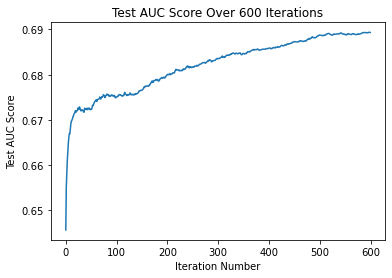

In [105]:
# Calculate the mean of the test AUC scores
print(np.mean(cv['test-auc-mean']))

# Plot the test AUC scores for each iteration
plt.plot(cv['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [106]:
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv = 4)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[11:08:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## Hyper Tunning RandomForestClassifier

In [107]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [108]:
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,200,5)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:06:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.680 total time=  12.0s
[11:06:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.679 total time=   5.0s
[11:06:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'lo

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
                   scoring='accuracy', verbose=1)

In [109]:
rand_search.best_params_

{'n_estimators': 195}

In [110]:
rand_search.best_score_

0.6494258600331037

In [111]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 


In [112]:
rfc = RandomForestClassifier(criterion= 'gini', max_features='auto', n_estimators=190)

In [113]:
# Train the  model on the training data
rfc.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=190)

In [114]:
# Create predictions of probability for loan status using test data
preds3 = rfc.predict_proba(X_test)
# Create a dataframe for the probabilities of default

preds_df3 = pd.DataFrame(preds3[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
preds_df3 = pd.concat([true_df.reset_index(drop = True), preds_df3], axis = 1)

# Reassign loan status based on the threshold
preds_df3['loan_status_predicted'] = preds_df3['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
preds_df3['predicted_status']= preds_df3['prob_default'].apply(lambda x: 'Non Default' if x > 0.4 else 'Default')
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df3['loan_status_predicted']))

# Print the classification report
target_names = ['Non Default','Default']
print(classification_report(y_test, preds_df3['loan_status_predicted'], target_names=target_names))

[[1525 2044]
 [ 223 3377]]
              precision    recall  f1-score   support

 Non Default       0.87      0.43      0.57      3569
     Default       0.62      0.94      0.75      3600

    accuracy                           0.68      7169
   macro avg       0.75      0.68      0.66      7169
weighted avg       0.75      0.68      0.66      7169



The accuracy of the Random Forest Classifier is: 67.10838331705956 %


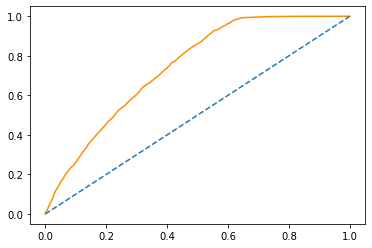

0.7427783615080477

In [115]:
# Print the accuracy score the model
score3= rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', score3 * 100, '%')

# Plot the ROC curve of the probabilities of default
prob_default3 = preds3[:, 1]
c=fallout_rfc, sensitivity_rfc, thresholds_rfc = metrics.roc_curve(y_test, prob_default3)
plt.plot(fallout_rfc, sensitivity_rfc, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc3 = roc_auc_score(y_test, preds3[:,1])
auc3

In [116]:
predsRFC = rfc.predict(X_test)


The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      3569
           1       0.65      0.75      0.70      3600

    accuracy                           0.67      7169
   macro avg       0.67      0.67      0.67      7169
weighted avg       0.67      0.67      0.67      7169



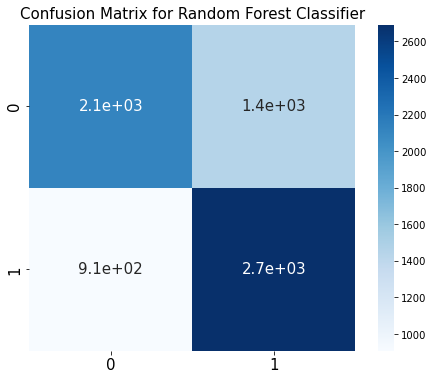

In [117]:
generate_results(rfc, predsRFC, 'Random Forest Classifier')

## Tpot

In [118]:
model = TPOTClassifier(generations=2,
                       mutation_rate=0.2, 
                       population_size=50, 
                       cv=5, scoring='balanced_accuracy', 
                       verbosity=3, 
                       n_jobs=-1)
model.fit(X_train, np.ravel(y_train))

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]

/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/dehilinesma/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warni

_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 1 - Current Pareto front scores:

-1	0.6525793665570397	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.7000000000000001, ExtraTreesClassifier__min_samples_leaf=4, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100)

Generation 2 - Current Pareto front scores:

-1	0.6525793665570397	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.7000000000000001, ExtraTreesClassifier__min_samples_leaf=4, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100)


TPOTClassifier(generations=2, mutation_rate=0.2, n_jobs=-1, population_size=50,
               scoring='balanced_accuracy', verbosity=3)

In [119]:
# Create predictions of probability for loan status using test data
preds4 = model.predict_proba(X_test)
# Create a dataframe for the probabilities of default

preds_df4 = pd.DataFrame(preds4[:, 1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
preds_df4 = pd.concat([true_df.reset_index(drop = True), preds_df4], axis = 1)

# Reassign loan status based on the threshold
preds_df4['loan_status_predicted'] = preds_df4['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
preds_df4['predicted_status']= preds_df4['prob_default'].apply(lambda x: 'Non Default' if x > 0.4 else 'Default')
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df4['loan_status_predicted']))

# Print the classification report
target_names = ['Non Default','Default']
print(classification_report(y_test, preds_df4['loan_status_predicted'], target_names=target_names))

[[1193 2376]
 [ 131 3469]]
              precision    recall  f1-score   support

 Non Default       0.90      0.33      0.49      3569
     Default       0.59      0.96      0.73      3600

    accuracy                           0.65      7169
   macro avg       0.75      0.65      0.61      7169
weighted avg       0.75      0.65      0.61      7169



The accuracy of the TPOT is: 67.3272625385262 %


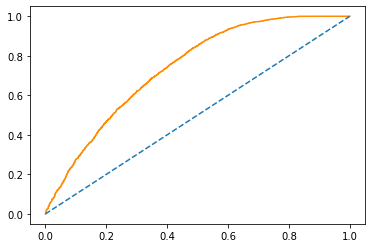

0.737444195386196

In [120]:
# Print the accuracy score the model
score4= model.score(X_test, y_test)
print('The accuracy of the TPOT is:', score4 * 100, '%')

# Plot the ROC curve of the probabilities of default
prob_default4 = preds4[:, 1]
v=fallout_tpot, sensitivity_tpot, thresholds_tpot = metrics.roc_curve(y_test, prob_default4)
plt.plot(fallout_tpot, sensitivity_tpot, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc4 = roc_auc_score(y_test, prob_default4)
auc4


## Comparing 


### Classification report

In [121]:
from sklearn.metrics import precision_recall_fscore_support

# Print the logistic regression classification report
target_names = ['Non Default','Default']
print(classification_report(y_test, preds_df['loan_status_predicted'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df2['loan_status_predicted'], target_names=target_names))

# Print the Random Forest classification report
print(classification_report(y_test, preds_df3['loan_status_predicted'], target_names=target_names))

# Print the Extra Tree (TPOT) classification report
print(classification_report(y_test, preds_df4['loan_status_predicted'], target_names=target_names))





              precision    recall  f1-score   support

 Non Default       0.72      0.24      0.36      3569
     Default       0.55      0.91      0.68      3600

    accuracy                           0.58      7169
   macro avg       0.64      0.57      0.52      7169
weighted avg       0.63      0.58      0.52      7169

              precision    recall  f1-score   support

 Non Default       0.85      0.25      0.39      3569
     Default       0.56      0.95      0.71      3600

    accuracy                           0.61      7169
   macro avg       0.71      0.60      0.55      7169
weighted avg       0.70      0.61      0.55      7169

              precision    recall  f1-score   support

 Non Default       0.87      0.43      0.57      3569
     Default       0.62      0.94      0.75      3600

    accuracy                           0.68      7169
   macro avg       0.75      0.68      0.66      7169
weighted avg       0.75      0.68      0.66      7169

              preci

In [122]:
Models= ['Logistic Regression', 'Gardian boosted tree', 'Random Forest', 'TPOT']
Accuracy= [score, score2, score3, score4]
AUC= [auc1, auc2, auc3, auc4]


In [123]:
Comparison= pd.DataFrame(zip(Models, Accuracy, AUC), columns= ['Models','Accuracy', 'AUC'])

In [124]:
Comparison.set_index('Models')

,Accuracy,AUC
Models,,
Logistic Regression,0.577347,0.618945
Gardian boosted tree,0.623797,0.688455
Random Forest,0.671084,0.742778
TPOT,0.673273,0.737444


In [125]:
#Comparison.to_csv('/Users/dehilinesma/Downloads/Final Project- Risk Analysis/comparison_models.csv')

In [126]:
Models= ['Logistic Regression', 'Gardian boosted tree', 'Random Forest', 'TPOT']
fallout= [w[0], x[0], c[0], v[0]]
sensitivity= [w[1], x[1], c[1], v[1]]

In [127]:
AUC= pd.DataFrame(zip(Models, fallout, sensitivity), columns= ['Models','Fallout', 'Sensitivity']).set_index('Models')

In [128]:
#AUC.to_csv('/Users/dehilinesma/Downloads/Final Project- Risk Analysis/auc_models.csv')

### Printing AUC diffrences

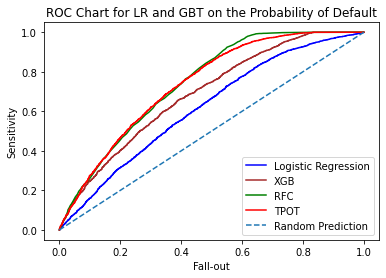

In [129]:
# ROC chart components
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, preds[:,1])
fallout_xgb, sensitivity_xgb, thresholds_xgb = metrics.roc_curve(y_test, preds2[:,1])
fallout_rfc, sensitivity_rfc, thresholds_rfc = metrics.roc_curve(y_test, preds3[:,1])
fallout_tpot, sensitivity_tpot, thresholds_tpot = metrics.roc_curve(y_test, preds4[:,1])

# ROC Chart with both
plt.plot(fallout, sensitivity, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_xgb, sensitivity_xgb, color = 'brown', label='%s' % 'XGB')
plt.plot(fallout_rfc, sensitivity_rfc, color = 'green', label='%s' % 'RFC')
plt.plot(fallout_tpot, sensitivity_tpot, color = 'red', label='%s' % 'TPOT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

### Checking Calibration 

In [130]:
from sklearn.calibration import calibration_curve
a=calibration_curve(y_test, preds[:,1], n_bins = 20)
frac_of_pos_lr=a[0]
mean_pred_val_lr=a[1]




b=calibration_curve(y_test, preds2[:,1], n_bins = 20)
frac_of_pos_XGB= b[0]
mean_pred_val_XGB= b[1]



p=calibration_curve(y_test, preds3[:,1], n_bins = 20)
frac_of_pos_RFC=p[0]
mean_pred_val_RFC=p[1]



d=calibration_curve(y_test, preds4[:,1], n_bins = 20)
frac_of_pos_TPOT=d[0]
mean_pred_val_TPOT=d[1]


In [131]:
Models= ['Logistic Regression', 'Gardian boosted tree', 'Random Forest', 'TPOT']
frac= [a[0], b[0], p[0], d[0]]
mean_pred= [a[1], b[1], p[1], d[1]]

In [132]:
calibration= pd.DataFrame(zip(Models, frac, mean_pred), columns= ['Models','frac_of_pos', 'mean_pred']).set_index('Models')

In [133]:
calibration

,frac_of_pos,mean_pred
Models,,
Logistic Regression,"[0.8333333333333334, 0.16666666666666666, 0.15...","[0.01480587227722624, 0.08027352856397078, 0.1..."
Gardian boosted tree,"[0.0, 0.0, 0.0, 0.043478260869565216, 0.1875, ...","[0.0022810687230917937, 0.07563416659832001, 0..."
Random Forest,"[0.0, 0.0, 0.03225806451612903, 0.017391304347...","[0.011244867487868557, 0.07437673130193904, 0...."
TPOT,"[0.0, 0.0, 0.0, 0.0, 0.12121212121212122, 0.08...","[0.010919273355584463, 0.07507567220343715, 0...."


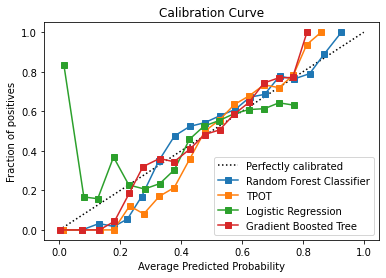

In [134]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated') 

plt.plot(mean_pred_val_RFC, frac_of_pos_RFC,
         's-', label='%s' % 'Random Forest Classifier')
plt.plot(mean_pred_val_TPOT, frac_of_pos_TPOT,
         's-', label='%s' % 'TPOT')
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_XGB, frac_of_pos_XGB,
         's-', label='%s' % 'Gradient Boosted Tree')

plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()


## Modelling : We take our best model and use it for our strategy 

In [135]:
Comparison.loc[(Comparison['Accuracy']==Comparison['Accuracy'].max() ) & (Comparison['AUC'] ==Comparison['AUC'].max())]

,Models,Accuracy,AUC


## Looking for a strategy 


In [136]:
accept_rates=[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [137]:
thresholds=[]
badrates=[]

In [138]:
for i in accept_rates:
    # Calculate the threshold 
    threshold= round(np.quantile(preds_df3['prob_default'],i),3)
    thresholds.append(threshold)
    
    for i in thresholds:
        preds_df3['pred_loan_status'] = preds_df3['prob_default'].apply(lambda x: 0 if x > i else 1)
        
        # Apply acceptance rate threshold
        accepted_loans= preds_df3[preds_df3['pred_loan_status'] == 1]
        
        # Calculating the bad rate 
        badrates.append(np.sum((accepted_loans['Loan Status'])/accepted_loans['Loan Status'].count()))

  

In [139]:
#creating the Strategy DataFrame
strategy= pd.DataFrame(zip(accept_rates, thresholds, badrates), columns= ['Acceptance Rate', 'Thresholds', 'Error rate'])

In [140]:
#strategy['Num of Accepted Loans']=

Num_of_Accepted_Loans=[]

#Calculating the Num of Accepted Loans
for i in accept_rates:
    a = len(preds_df3[preds_df3['prob_default']< np.quantile(preds_df3['prob_default'], i)])
    Num_of_Accepted_Loans.append(a)


In [141]:
strategy['Num of Accepted Loans']= Num_of_Accepted_Loans

In [142]:
#Adding the avg loan
strategy['Avg Loan Amount']= avg_loan = np.mean(X_test['Current Loan Amount'])

In [143]:
# Calculating the Estimated Value
strategy['Estimated Value']= ((strategy['Num of Accepted Loans'] * (1- strategy['Error rate'])) * strategy['Avg Loan Amount']) - (strategy['Num of Accepted Loans'] * strategy['Error rate'] * strategy['Avg Loan Amount'])

In [144]:
round(strategy,2)

,Acceptance Rate,Thresholds,Error rate,Num of Accepted Loans,Avg Loan Amount,Estimated Value
0,1.00,0.93,0.50,7168,293707.49,-8811224.73
1,0.95,0.73,0.50,6777,293707.49,-8330590.12
2,0.90,0.69,0.49,6439,293707.49,51067788.65
3,0.85,0.66,0.50,6024,293707.49,-7404968.99
4,0.80,0.64,0.49,5676,293707.49,45016426.21
5,0.75,0.62,0.47,5286,293707.49,85595731.92
6,0.70,0.60,0.50,4977,293707.49,-6117949.98
7,0.65,0.58,0.49,4631,293707.49,36728518.28
8,0.60,0.57,0.47,4274,293707.49,69208505.15
9,0.55,0.55,0.46,3851,293707.49,90648200.55


In [145]:
#strategy.to_excel('/Users/dehilinesma/Downloads/Final Project- Risk Analysis/strategy.xlsx')

In [146]:
# Print the row with the max estimated value
best= strategy.loc[strategy['Estimated Value'] == strategy['Estimated Value'].max()]
best

,Acceptance Rate,Thresholds,Error rate,Num of Accepted Loans,Avg Loan Amount,Estimated Value
9,0.55,0.547,0.459928,3851,293707.490863,9.064820e+07


In [147]:
a=best['Thresholds'][9]

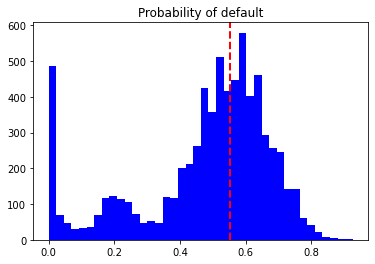

In [149]:
fig, (ax1) = plt.subplots(1, 1)
ax1.hist(preds_df3['prob_default'], color = 'blue', bins = 40)
ax1.set_title('Probability of default')
ax1.axvline(x=0.553, color='r', linestyle='dashed', linewidth=2)

